In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('TWTR.csv') 

In [14]:
df.dropna(inplace=True)

In [15]:
df.head(15)

,Date,Open,High,Low,Close,Volume
0,07-11-2013,45.10,50.09,44.00,44.90,117701600
1,08-11-2013,45.93,46.94,40.69,41.65,27925300
2,11-11-2013,40.50,43.00,39.40,42.90,16113900
3,12-11-2013,43.66,43.78,41.83,41.90,6316700
4,13-11-2013,41.03,42.87,40.76,42.60,8688300
5,14-11-2013,42.34,45.67,42.24,44.69,11099400
6,15-11-2013,45.25,45.27,43.43,43.98,8010600
7,18-11-2013,43.50,43.95,40.85,41.14,12810600
8,19-11-2013,41.39,41.90,40.00,41.75,7436600
9,20-11-2013,41.40,41.75,40.51,41.05,5767300


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2259 entries, 0 to 2258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2259 non-null   object 
 1   Open    2259 non-null   float64
 2   High    2259 non-null   float64
 3   Low     2259 non-null   float64
 4   Close   2259 non-null   float64
 5   Volume  2259 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 123.5+ KB


In [17]:
df.describe()

,Open,High,Low,Close,Volume
count,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,36.020139,36.699881,35.339465,36.003625,2.172608e+07
std,14.118535,14.372058,13.828719,14.089974,1.905818e+07
min,13.950000,14.220000,13.725000,14.010000,3.661053e+06
25%,25.550000,26.215000,24.912500,25.410000,1.233062e+07
50%,35.420000,36.100000,34.820000,35.490000,1.687289e+07
75%,44.205000,45.015000,43.327500,44.135000,2.423908e+07
max,78.360000,80.750000,76.050000,77.630000,2.684174e+08


In [18]:
df.shape

(2259, 6)

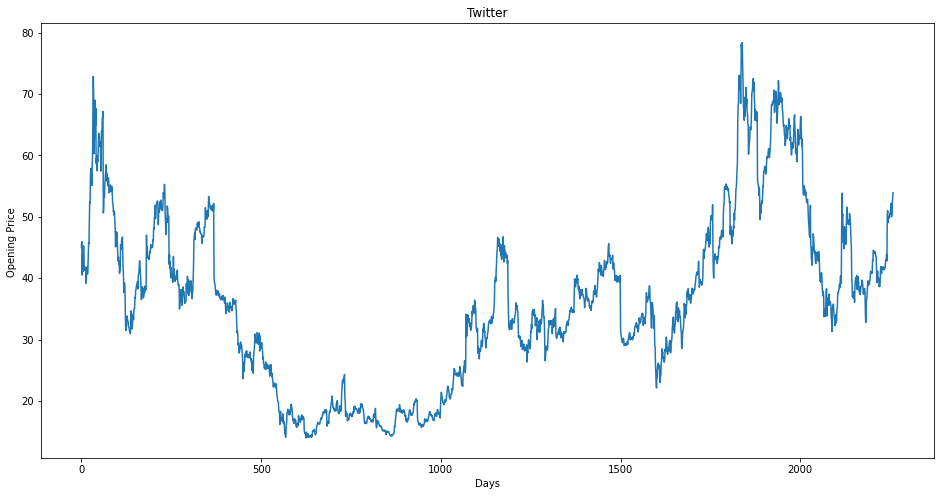

In [19]:
plt.figure(figsize=(16,8))
plt.title('Twitter')
plt.xlabel('Days')
plt.ylabel('Opening Price ')
plt.plot(df['Open'])
plt.show()

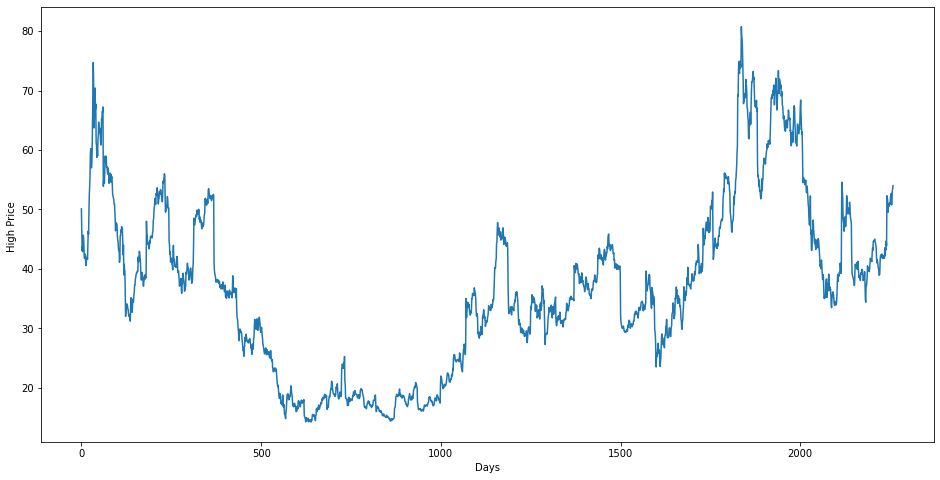

In [20]:
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('High Price ')
plt.plot(df['High'])
plt.show()

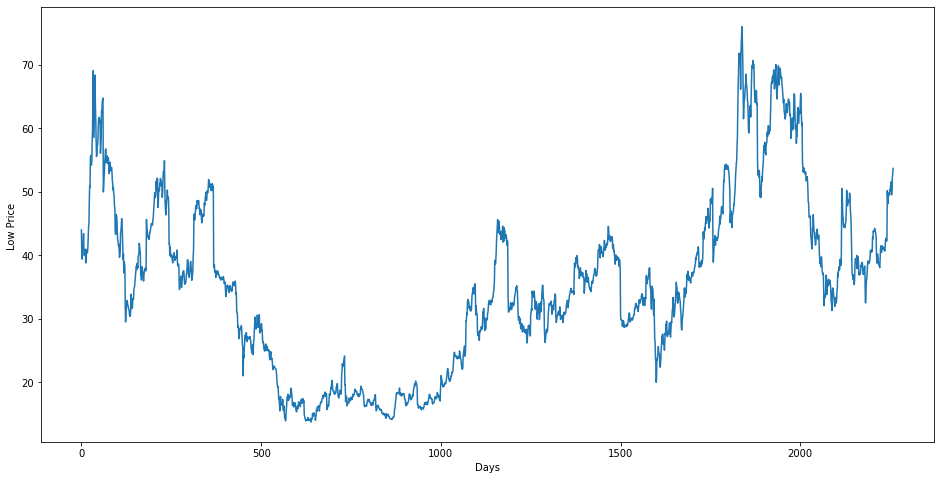

In [21]:
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('Low Price ')
plt.plot(df['Low'])
plt.show()

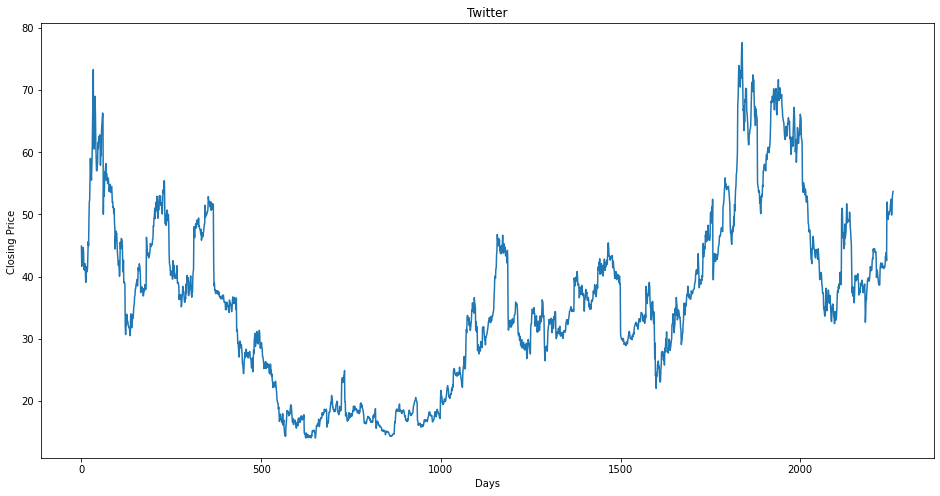

In [22]:
plt.figure(figsize=(16,8))
plt.title('Twitter')
plt.xlabel('Days')
plt.ylabel('Closing Price ')
plt.plot(df['Close'])
plt.show()

In [23]:
df2 = df['Close']

In [24]:
df2.tail()

2254    49.89
2255    51.52
2256    52.78
2257    53.35
2258    53.70
Name: Close, dtype: float64

In [25]:
df2 = pd.DataFrame(df2)     

In [26]:
df2.tail()

,Close
2254,49.89
2255,51.52
2256,52.78
2257,53.35
2258,53.70


In [27]:
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [28]:
df2.tail()

,Close,Prediction
2254,49.89,NaN
2255,51.52,NaN
2256,52.78,NaN
2257,53.35,NaN
2258,53.70,NaN


In [29]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]

C:\Users\bhuva\AppData\Local\Temp/ipykernel_13860/3905676318.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Prediction'], 1))[:-future_days]


In [30]:
y = np.array(df2['Prediction'])[:-future_days]

# Linear and Decision Tree Regression

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [33]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [34]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

C:\Users\bhuva\AppData\Local\Temp/ipykernel_13860/2356529481.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df2.drop(['Prediction'], 1)[:-future_days]


In [35]:
tree_prediction = tree.predict(x_future)

In [36]:
lr_prediction = lr.predict(x_future)

In [37]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

C:\Users\bhuva\AppData\Local\Temp/ipykernel_13860/4118842179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Next 100 Days

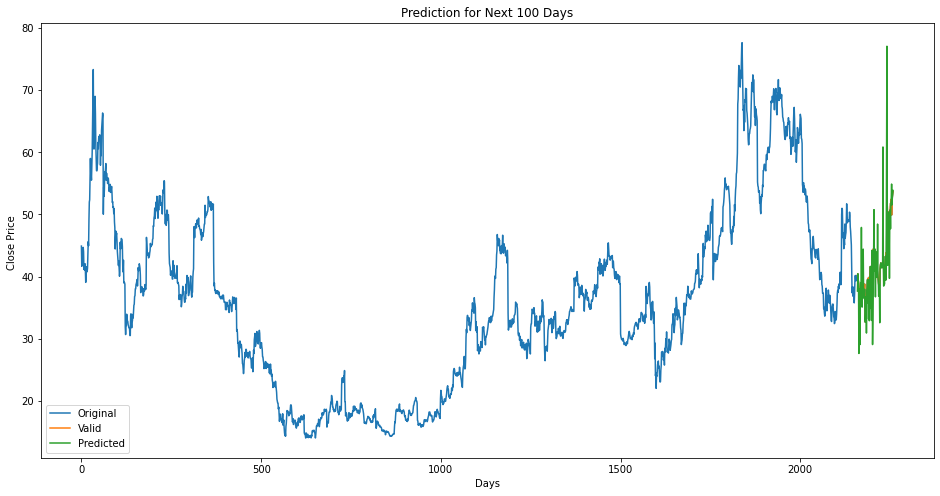

In [38]:
plt.figure(figsize=(16,8))
plt.title("Prediction for Next 100 Days")
plt.xlabel('Days')
plt.ylabel('Close Price ')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()